**Mid Exam Model Deployment**

Nama : Natasha Kayla Cahyadi

NIM : 2702235891

Kelas : LC09

# Libraries

In [35]:
# Import libraries
import pandas as pd
import numpy as np
import pickle as pkl

import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# Data Preparation

In [36]:
# Read the data
df = pd.read_csv('Dataset_A_loan.csv')

In [37]:
# Display the data
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [38]:
df.shape

(45000, 14)

This dataset contains 45,000 rows and 14 columns.

In [39]:
# Show info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   42750 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

Based on the results above, it can be seen that the 'person\_income' column contains missing values.

In [40]:
# Show statistics descriptive
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.275000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.018223e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,7.331158e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.726725e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.705500e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.582125e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,5.556399e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


Based on the descriptive statistics, there are no anomalies in the numerical columns.

In [41]:
# Show unique number
df.nunique()

person_age                           60
person_gender                         4
person_education                      5
person_income                     32637
person_emp_exp                       63
person_home_ownership                 4
loan_amnt                          4483
loan_intent                           6
loan_int_rate                      1302
loan_percent_income                  64
cb_person_cred_hist_length           29
credit_score                        340
previous_loan_defaults_on_file        2
loan_status                           2
dtype: int64

# Data Splitting

In [42]:
# Train Test Split
# Drop the stage column for the variable x
x = df[df.columns.drop(['loan_status'])]
# Fill the y variable with stage
y = df['loan_status']

# Split the data to 80% train data and 20% test data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=42)
print(x_train.shape,x_test.shape)

(36000, 13) (9000, 13)


The train and test sets are split into 80% and 20%. This can be seen from the contents of `x_train`, which has 36,000 rows and 13 columns, and `x_test`, which has 9,000 rows and 13 columns.

In [43]:
x_train.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file
25180,34.0,female,Bachelor,97265.0,11,MORTGAGE,15000.0,PERSONAL,12.73,0.15,9.0,631,No
12555,25.0,male,High School,NaN,3,RENT,12000.0,VENTURE,11.86,0.16,4.0,659,Yes
29153,41.0,female,Master,322597.0,18,MORTGAGE,24000.0,PERSONAL,10.37,0.07,11.0,683,Yes
23838,27.0,male,Associate,94232.0,4,RENT,9600.0,EDUCATION,17.14,0.10,7.0,641,No
35686,27.0,male,Master,NaN,7,RENT,7059.0,HOMEIMPROVEMENT,12.97,0.08,3.0,706,Yes


In [44]:
y_train.head()

25180    0
12555    0
29153    0
23838    0
35686    0
Name: loan_status, dtype: int64

In [45]:
x_train.columns

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file'],
      dtype='object')

# Data Preprocessing

## Check Duplicated Data

In [46]:
# Show duplicated data
df.duplicated().sum()

0

There are no duplicated records in this dataset.

## Handle Missing Values

In [47]:
df.isnull().sum()

person_age                           0
person_gender                        0
person_education                     0
person_income                     2250
person_emp_exp                       0
person_home_ownership                0
loan_amnt                            0
loan_intent                          0
loan_int_rate                        0
loan_percent_income                  0
cb_person_cred_hist_length           0
credit_score                         0
previous_loan_defaults_on_file       0
loan_status                          0
dtype: int64

There are 2,250 missing values in the 'person\_income' column.

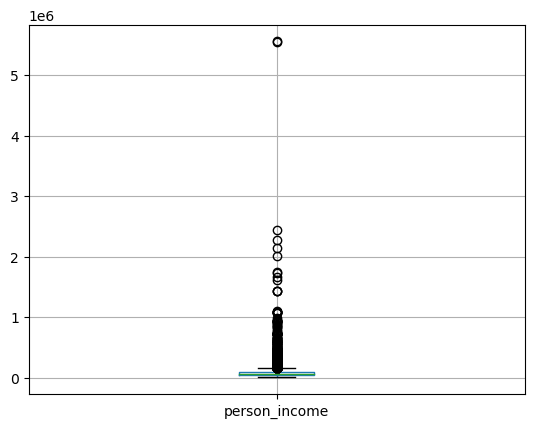

In [48]:
# Check outliers
boxplot = x_train.boxplot('person_income')
plt.show()

Missing values in the 'person\_income' column were imputed using the median because this column contains many outliers. The median is considered more representative in this case, as it is more robust to outliers compared to the mean.

In [49]:
# Calculate median for 'person_income' column
x_train['person_income'].median()

67104.0

In [50]:
# Impute missing values with median for train and test data
x_train['person_income'].fillna(67055.0, inplace=True)
x_test['person_income'].fillna(67055.0, inplace=True)

# Exploratory Data Analysis

In [51]:
# Make an empty variable to store categorical and numerical columns
categorical_columns = []
numerical_columns = []

# Looping to divide categorical and numerical, then store it to an empty variable that we've made
for i in x_train.columns:
    if 'int' in str(x_train[i].dtype) or 'float' in str(x_train[i].dtype):
        numerical_columns.append(i)
    else:
        categorical_columns.append(i)

# Display the categorical and numerical columns
print(f'Categorical: {categorical_columns}')
print(f'Numeric: {numerical_columns}')

Categorical: ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']
Numeric: ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score']


In [52]:
# Count the categorical values in each columns
for i in categorical_columns:
    print(x_train[i].value_counts(),'\n')

person_gender
male       19782
female     16149
Male          35
fe male       34
Name: count, dtype: int64 

person_education
Bachelor       10772
Associate       9607
High School     9508
Master          5609
Doctorate        504
Name: count, dtype: int64 

person_home_ownership
RENT        18727
MORTGAGE    14795
OWN          2379
OTHER          99
Name: count, dtype: int64 

loan_intent
EDUCATION            7381
MEDICAL              6818
VENTURE              6227
PERSONAL             6030
DEBTCONSOLIDATION    5731
HOMEIMPROVEMENT      3813
Name: count, dtype: int64 

previous_loan_defaults_on_file
Yes    18253
No     17747
Name: count, dtype: int64 



Anomalies were found in the 'person\_gender' column, such as inconsistent entries like 'male' and 'Male', as well as 'female' and 'fe male'. These inconsistencies need to be cleaned to ensure consistent values in the column.

## Handle the Anomalies

In [53]:
# Standardize entries
x_train['person_gender'] = x_train['person_gender'].str.lower().str.replace(" ", "")
x_train['person_gender'] = x_train['person_gender'].replace({
    'male': 'male',
    'female': 'female'
})

# Count occurrences of each gender
gender_counts = x_train['person_gender'].value_counts()
print(gender_counts)

person_gender
male      19817
female    16183
Name: count, dtype: int64


In [54]:
# Standardize entries
x_test['person_gender'] = x_test['person_gender'].str.lower().str.replace(" ", "")
x_test['person_gender'] = x_test['person_gender'].replace({
    'male': 'male',
    'female': 'female'
})

# Count occurrences of each gender
gender_counts = x_test['person_gender'].value_counts()
print(gender_counts)

person_gender
male      5027
female    3973
Name: count, dtype: int64


The anomalies in the 'person\_gender' column were handled by converting all values to lowercase and consolidating the variations into two consistent categories: 'male' and 'female'.

## Check Distribution

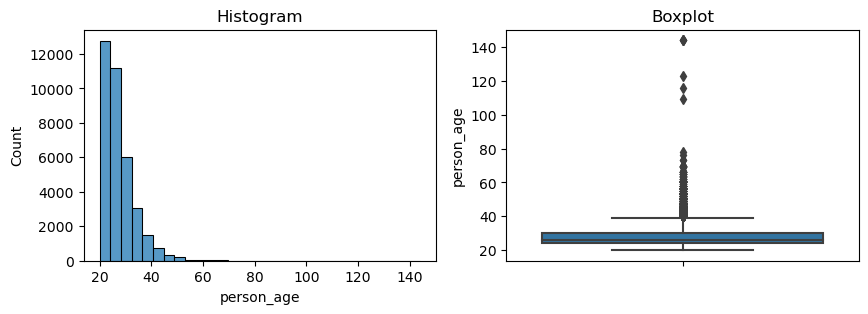

Skewness: 2.580516594705922
Kurtosis: 20.00793291292457


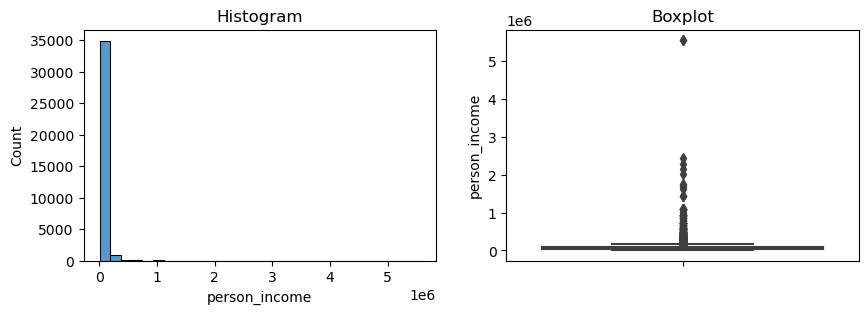

Skewness: 27.420964402130902
Kurtosis: 1652.2826175762511


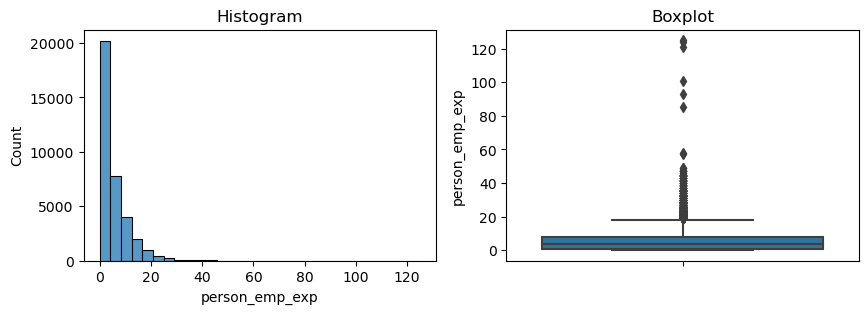

Skewness: 2.621040028725305
Kurtosis: 20.532830470119627


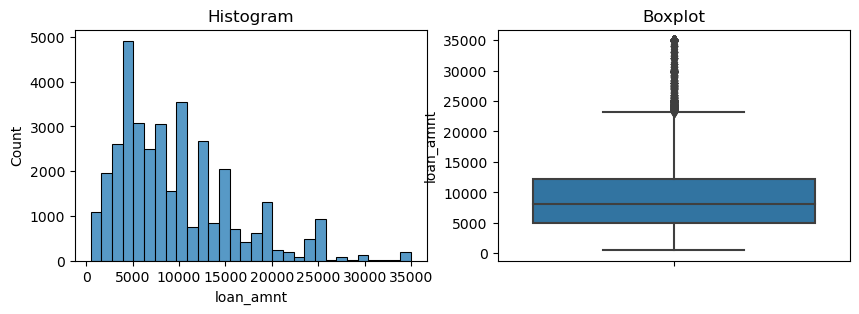

Skewness: 1.1740944055795806
Kurtosis: 1.318757295748434


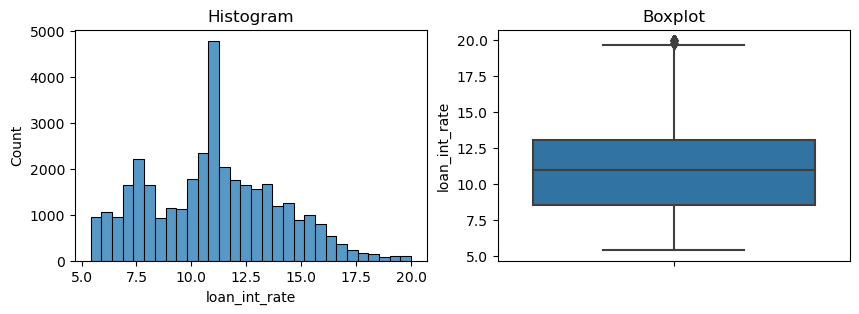

Skewness: 0.21449595878360378
Kurtosis: -0.42754481571503167


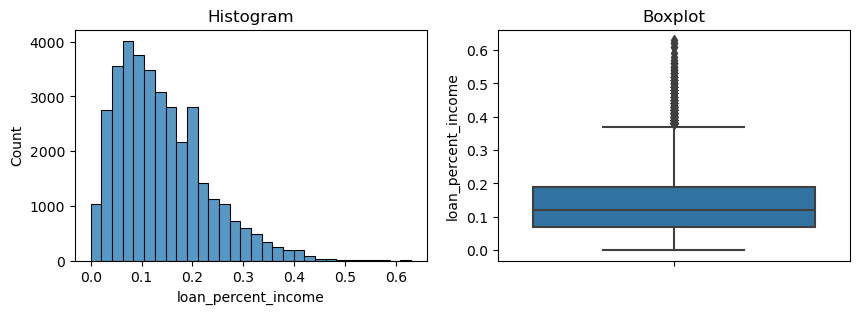

Skewness: 1.0226315129573393
Kurtosis: 1.031793683220228


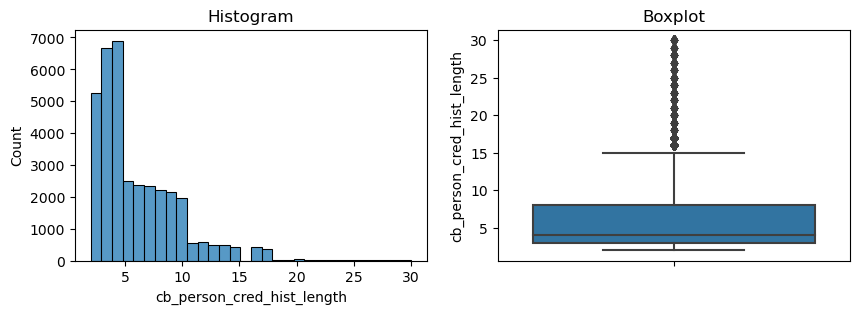

Skewness: 1.6195093652685095
Kurtosis: 3.640221504844234


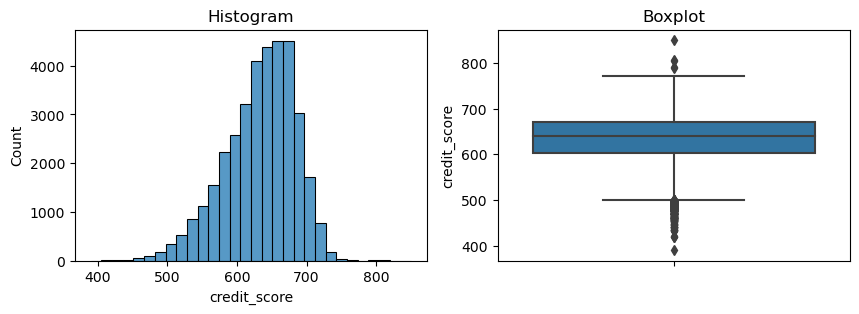

Skewness: -0.6060110939638604
Kurtosis: 0.1868455723001441


In [55]:
# Make a plot to check distribution
def check_distribution_outliers(df, columns):
    for i in columns:
        plt.figure(figsize=(10, 3))

        # Histogram
        plt.subplot(1, 2, 1)
        sns.histplot(df[i], bins=30)
        plt.title('Histogram')

        # Boxplot
        plt.subplot(1, 2, 2)
        sns.boxplot(y=df[i])
        plt.title('Boxplot')

        plt.show()

        print('Skewness:', df[i].skew())
        print('Kurtosis:', df[i].kurt())

check_distribution_outliers(x_train[numerical_columns], numerical_columns)

Based on the initial exploration, all numerical columns in the dataset are not normally distributed and contain a considerable number of outliers. However, these outliers are still within a reasonable range in the context of the data, so they were not removed and are considered unlikely to interfere with the modeling process.

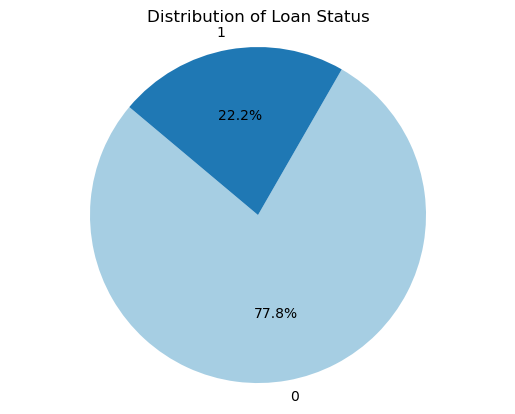

In [56]:
# Pie chart for distribution of loan status
loan_status_counts = y_train.value_counts()

plt.pie(
    loan_status_counts,
    labels=loan_status_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Paired.colors
)
plt.title('Distribution of Loan Status')
plt.axis('equal') 
plt.show()

The distribution of values in the target variable shows that only about 22% of the data falls into the 'approved' category, while the remaining 78% falls into the 'rejected' category. This indicates a class imbalance, with a ratio of approximately 1:4 between 'approved' and 'rejected'.

# Feature Engineering

## Encoding

In [57]:
# Binary encoding categorical to integer
gender_encode = {'person_gender': {'male':1, 'female':0}}
x_train=x_train.replace(gender_encode)
x_test=x_test.replace(gender_encode)

previous_loan_encode = {'previous_loan_defaults_on_file': {'Yes':1, 'No':0}}
x_train=x_train.replace(previous_loan_encode)
x_test=x_test.replace(previous_loan_encode)

In the encoding stage, binary encoding was used for the 'gender\_encode' and 'previous\_loan\_defaults\_on\_file' columns because both columns contain only two categories. As a result, the encoding produced binary values of 0 and 1, representing each respective category.

In [58]:
filename = 'gender_encode.pkl'
pkl.dump(gender_encode, open(filename, 'wb'))

In [59]:
filename = 'previous_loan_defaults_on_file_encode.pkl'
pkl.dump(previous_loan_encode, open(filename, 'wb'))

The results of the binary encoding were saved into a pickle file to be reused during the implementation in the Streamlit application. This way, the encoding process does not need to be repeated—simply loading the pre-prepared pickle file will suffice.

In [60]:
# Label encoding categorical to integer
person_education_encode = {'person_education' :
    {'High School': 0,
    'Associate': 1,
    'Bachelor': 2,
    'Master': 3,
    'Doctorate': 4}
}

x_train=x_train.replace(person_education_encode)
x_test=x_test.replace(person_education_encode)

In the encoding stage, I used manual ordinal encoding for the 'person\_education\_encode' column. Since this column has an inherent order, ordinal encoding was considered the most appropriate method. I chose to perform the encoding manually rather than using a library because manual encoding allows me to define the order of values according to the data context. This approach provides greater flexibility in handling ordinal categorical data.

In [61]:
filename = 'person_education_encode.pkl'
pkl.dump(person_education_encode, open(filename, 'wb'))

In [62]:
home_enc_train = x_train[['person_home_ownership']]
loan_intent_enc_train = x_train[['loan_intent']]

home_enc_test = x_test[['person_home_ownership']]
loan_intent_enc_test = x_test[['loan_intent']]

train_encoded_home = OneHotEncoder()
train_encoded_loan_intent = OneHotEncoder()

home_enc_train = pd.DataFrame(train_encoded_home.fit_transform(home_enc_train).toarray(),
                              columns=train_encoded_home.get_feature_names_out())
loan_intent_enc_train = pd.DataFrame(train_encoded_loan_intent.fit_transform(loan_intent_enc_train).toarray(),
                                     columns=train_encoded_loan_intent.get_feature_names_out())

home_enc_test = pd.DataFrame(train_encoded_home.transform(home_enc_test).toarray(),
                             columns=train_encoded_home.get_feature_names_out())
loan_intent_enc_test = pd.DataFrame(train_encoded_loan_intent.transform(loan_intent_enc_test).toarray(),
                                    columns=train_encoded_loan_intent.get_feature_names_out())

x_train = x_train.reset_index(drop=True)
x_test = x_test.reset_index(drop=True)

x_train = x_train.drop(columns=['person_home_ownership', 'loan_intent'],axis=1)
x_test = x_test.drop(columns=['person_home_ownership', 'loan_intent'],axis=1)

x_train = pd.concat([x_train, home_enc_train, loan_intent_enc_train], axis=1)
x_test = pd.concat([x_test, home_enc_test, loan_intent_enc_test], axis=1)

For the 'person\_home\_ownership' and 'loan\_intent' columns, one-hot encoding was used because both columns have more than two categories and are non-ordinal. With one-hot encoding, each category is transformed into a separate binary column, allowing for clearer representation without introducing irrelevant ordinal relationships.

In [63]:
train_encoded_home.get_feature_names_out()

array(['person_home_ownership_MORTGAGE', 'person_home_ownership_OTHER',
       'person_home_ownership_OWN', 'person_home_ownership_RENT'],
      dtype=object)

The `get_features_name_out` function is used to obtain the new column names generated after applying one-hot encoding. These new column names are very useful when saving the model and encoder into pickle files, so that when loaded later, the model can directly recognize and use consistent column names.

In [64]:
filename_subs = 'person_home_encode.pkl'
pkl.dump(train_encoded_home, open(filename_subs, 'wb'))

In [65]:
train_encoded_loan_intent.get_feature_names_out()

array(['loan_intent_DEBTCONSOLIDATION', 'loan_intent_EDUCATION',
       'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL',
       'loan_intent_PERSONAL', 'loan_intent_VENTURE'], dtype=object)

In [66]:
filename_subs = 'loan_intent_encode.pkl'
pkl.dump(train_encoded_loan_intent, open(filename_subs, 'wb'))

In [67]:
x_train.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,...,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,34.0,0,2,97265.0,11,15000.0,12.73,0.15,9.0,631,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,25.0,1,0,67055.0,3,12000.0,11.86,0.16,4.0,659,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,41.0,0,3,322597.0,18,24000.0,10.37,0.07,11.0,683,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,27.0,1,1,94232.0,4,9600.0,17.14,0.10,7.0,641,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,27.0,1,3,67055.0,7,7059.0,12.97,0.08,3.0,706,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


## Scaling

In [68]:
# Initialize Scalers
rob_scaler = RobustScaler()

# Scale the x train and x test
x_train = rob_scaler.fit_transform(x_train)
x_test = rob_scaler.transform(x_test)

Since the data distribution is not normal and contains many outliers, I used Robust Scaler for preprocessing. This method is more resistant to outliers compared to other normalization techniques, making it better suited to ensure the data remains well-standardized without being affected by extreme values.

In [69]:
filename_subs = 'robust_scaler.pkl'
pkl.dump(rob_scaler, open(filename_subs, 'wb'))

# Modelling

## Random Forest Model

In [70]:
RF_class = RandomForestClassifier(criterion= 'entropy',max_depth=4, class_weight='balanced')
RF_class.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=4)

In [71]:
# Make predictions
y_pred_rf = RF_class.predict(x_test)
y_pred_prob_rf = RF_class.predict_proba(x_test)[:, 1]

### Evaluation

In [72]:
# Classification Report
print("Classification Report Random Forest:\n", classification_report(y_test, y_pred_rf))

Classification Report Random Forest:
               precision    recall  f1-score   support

           0       0.97      0.83      0.89      6990
           1       0.60      0.90      0.72      2010

    accuracy                           0.84      9000
   macro avg       0.78      0.86      0.81      9000
weighted avg       0.89      0.84      0.85      9000



**Detailed Classification Report**

**Accuracy:** 84%, indicating that the model correctly classified 84% of the 9,000 samples.

**F1-Score Macro:** 81%, representing the average balance between precision and recall across all classes, without considering class proportions.

**F1-Score Weighted Average:** 85%, reflecting the average F1-Score weighted by the number of samples in each class.

---

**Rejected Class:**

* Precision: 0.97 → 97% of the predictions for class 0 are correct.
* Recall: 0.83 → The model successfully identified 83% of all actual class 0 cases.
* F1-Score: 0.89 → A high balance between precision and recall.

The model performs very well in recognizing the 'Rejected' class with very high precision. However, 17% of the 'Rejected' cases are still missed.

---

**Approved Class:**

* Precision: 0.60 → Only 60% of the predictions for class 1 are correct.
* Recall: 0.90 → 90% of the actual class 1 cases are correctly detected.
* F1-Score: 0.72 → Reasonably good, but there is an imbalance between precision and recall.

The model shows a high recall for the 'Approved' class but still makes many errors in prediction.

---

**Analysis**

Overall, the **Random Forest** model delivers fairly good results with an accuracy of 84%, indicating that the model has learned the data reasonably well.

## XGBoost Model

In [73]:
# Create an XGBoost classifier
xgb_model = XGBClassifier(
    n_estimators=100,          # Number of trees
    learning_rate=0.1,         # Learning rate
    subsample=0.8,             # Subsampling ratio of training instances
    colsample_bytree=0.8,      # Subsampling ratio of columns when constructing trees
    max_depth=6,               # Maximum depth of a tree
    random_state=42,           # Random seed for reproducibility
)

# Train the XGBoost model
xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [74]:
# Make predictions
y_pred_xgb = xgb_model.predict(x_test)
y_pred_prob_xgb = xgb_model.predict_proba(x_test)[:, 1]

### Evaluation

In [75]:
# Classification Report
print("Classification Report XGBoost Model:\n", classification_report(y_test, y_pred_xgb))

Classification Report XGBoost Model:
               precision    recall  f1-score   support

           0       0.94      0.97      0.96      6990
           1       0.89      0.78      0.83      2010

    accuracy                           0.93      9000
   macro avg       0.91      0.88      0.89      9000
weighted avg       0.93      0.93      0.93      9000



**Detailed Classification Report**

**Accuracy:** 93%, indicating that the model correctly predicted 93% of the total 9,000 samples. This is a significant improvement compared to the Random Forest model.

**F1-Score Macro:** 89%, showing a good balance between precision and recall for both classes, regardless of sample size.

**F1-Score Weighted Average:** 93%, demonstrating that the model performs very well across both classes.

---

**Rejected Class:**

* Precision: 0.94 → 94% of the predictions for class 0 are correct.
* Recall: 0.97 → 97% of class 0 cases were successfully detected.
* F1-Score: 0.96 → Very high, indicating a strong balance between precision and recall.

The model is highly reliable in identifying the 'Rejected' class. False negatives are very low, with almost all class 0 cases correctly detected.

---

**Approved Class:**

* Precision: 0.89 → 89% of the predictions for class 1 are correct.
* Recall: 0.78 → 78% of class 1 cases were found.
* F1-Score: 0.83 → Quite high and balanced.

Performance on the minority class has improved significantly compared to Random Forest. Although recall decreased slightly from 90% to 78%, precision increased substantially from 60% to 89%. This means the model is more accurate when predicting class 1, reducing false positives considerably.

---

**Analysis**

The XGBoost model shows more balanced and higher performance compared to Random Forest. XGBoost produces a more precise and overall stable model with fairer performance across classes.

# Save Best Model

In [76]:
filename = 'XGB_model.pkl'
pkl.dump(xgb_model, open(filename, 'wb'))

After comparing the performance between models, XGBoost proved to be the best model for this dataset. Therefore, the XGBoost model was saved into a pickle file so it can be directly used in the Streamlit application without needing to retrain the model from scratch.